In [96]:
import pandas as pd

#load data
file_path = "household_power_consumption.txt"
data = pd.read_csv(
    file_path,
    sep = ";",
    na_values = ['?', ''],
    low_memory = False)

#Parse datetime column
data['datetime'] = pd.to_datetime(
    data['Date'] + ' ' + 
    data['Time'], 
    dayfirst = True, 
    format = '%d/%m/%Y %H:%M:%S')
data.drop(['Date', 'Time'], axis=1, inplace=True)

print(data.head())

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            datetime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  


In [98]:
#null data
data_un = data.copy()
missing_values = data_un.isnull().sum()
print("Missing values:\n ", missing_values)

print("\nMissing Precentage:\n", (missing_values / len(data))*100)

Missing values:
  Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64

Missing Precentage:
 Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
datetime                 0.000000
dtype: float64


In [100]:
#fill missing values with mean

# Create a new DataFrame with missing values filled
data = data.fillna(data.mean())

# Verify missing values are filled
print("Missing values after filling:\n", data.isnull().sum())

Missing values after filling:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64


In [102]:
# Ensure numeric columns have the correct data type,  and not string

numeric_columns = data.columns.drop('datetime')
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(data.dtypes)

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object


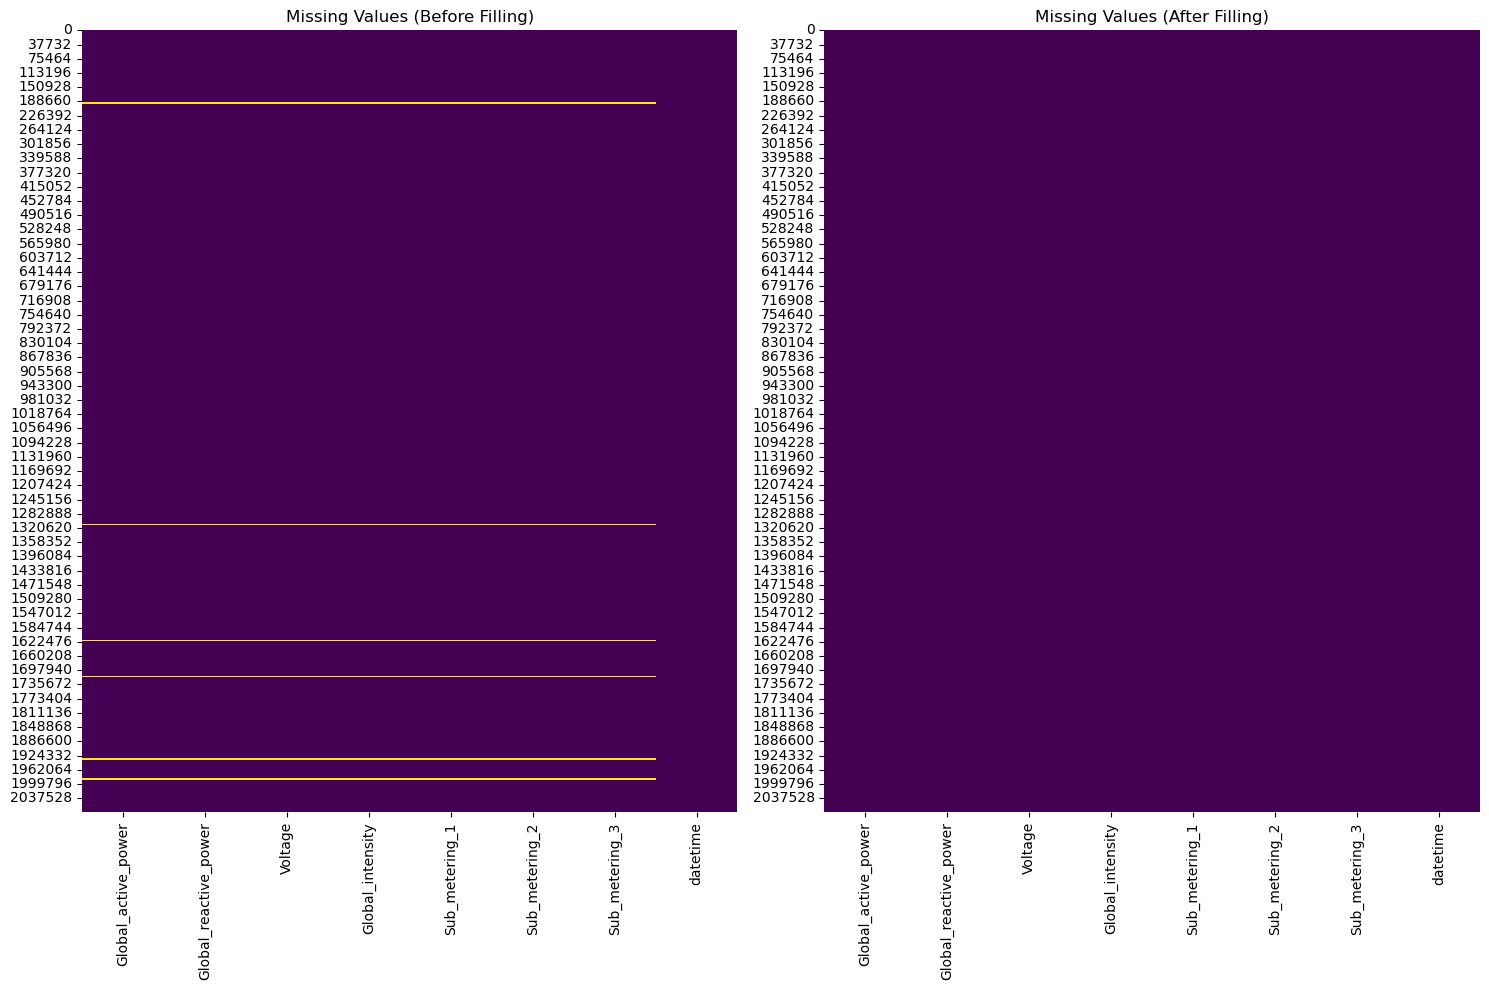

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot heatmaps for missing data

fig, axes = plt.subplots(1,2, figsize=(15,10))

# Heatmap before filling missing values
sns.heatmap(data_un.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title("Missing Values (Before Filling)")

# Heatmap after filling missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title("Missing Values (After Filling)")

plt.tight_layout()
plt.show()

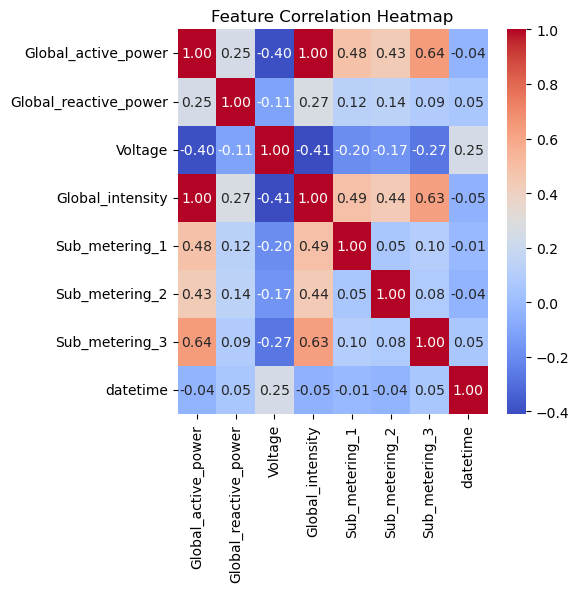

In [110]:
# Correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

#Strength, direction, and relationship between numerical features in the data set

In [118]:
#Normalize the data

from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data.drop(columns=['datetime']))
print("Data has normlized")

#normalization of scales of different features between 0,1

Data has normlized


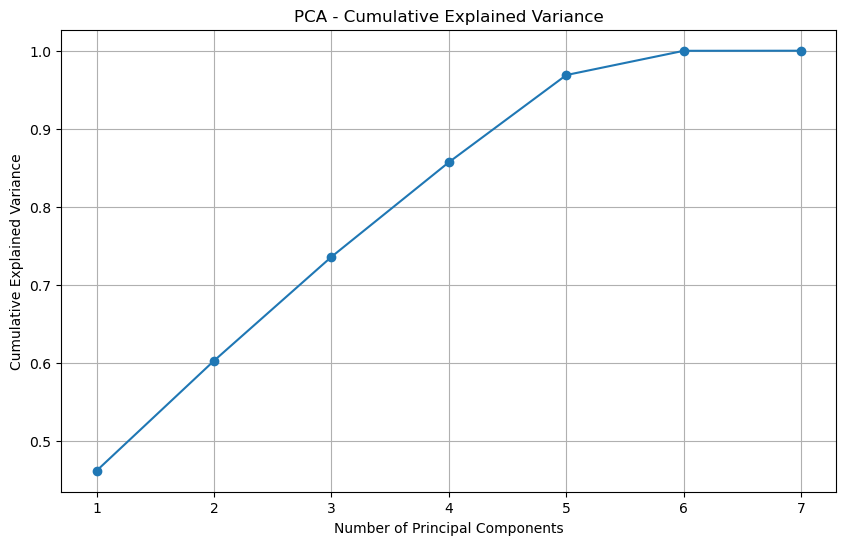

In [162]:
#DIMENSIONALOTY REDUCTION WITH PCA

from sklearn.decomposition import PCA

pca=PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

#simplify the data by reducing redundant features, for less computation

In [154]:
#selecting the numberical components that contain ~95% of the variance

n_components = sum(explained_variance.cumsum() <= .95)

#apply PCA to the selected
pca = PCA(n_components = n_components)
data_pca = pca.fit_transform(data_scaled)

print(f'Reduced data to {n_components} components.')


Reduced data to 4 components.


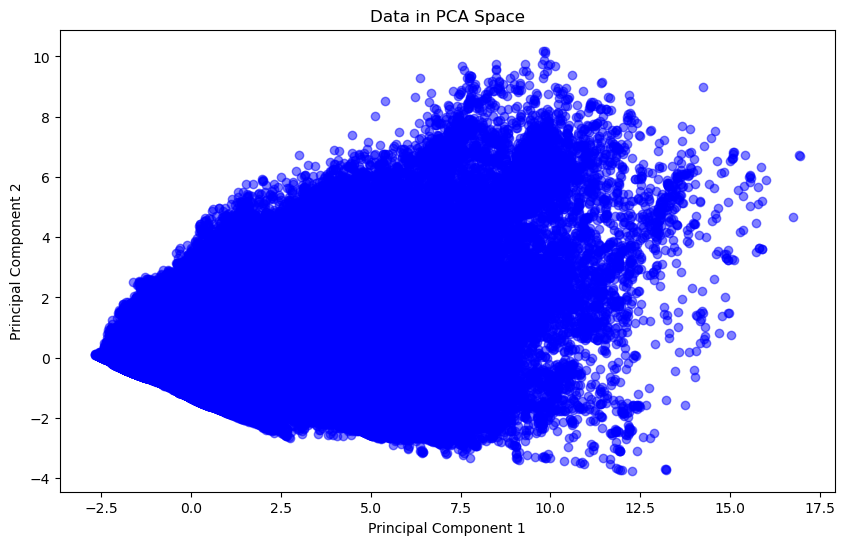

In [156]:

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in PCA Space')
plt.show()

#relation of PC1 and PC2, PC1 captures the most variable data and 
#PC2 captures the second most orthagonal(uncorrelated) to PC1 

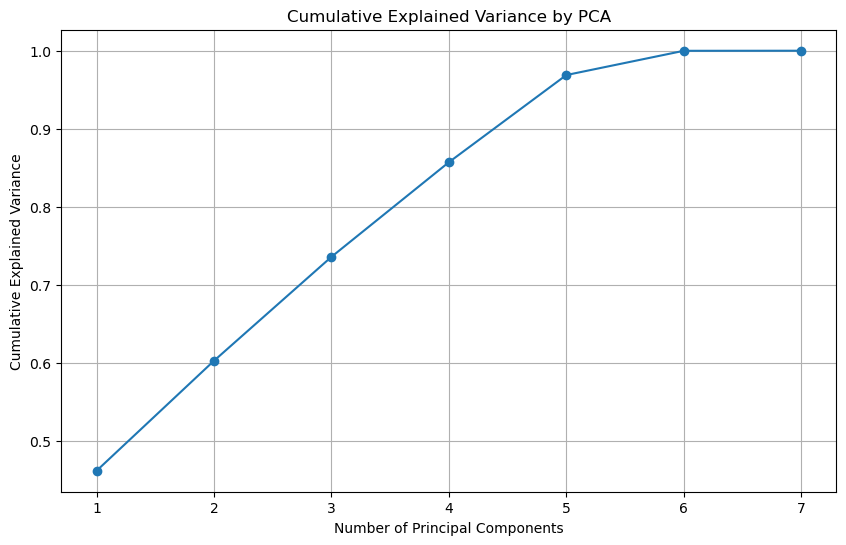

In [164]:
# Plot cumulative explained variance again
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid()
plt.show()

#PC1 alone explains ~.46 of the total variance
#adding PC2 increases the explanation variance to .6


Feature Loadings on Principal Components:
                            PC1       PC2       PC3       PC4
Global_active_power    0.538110 -0.051120 -0.029787  0.044768
Global_reactive_power  0.186795  0.670378  0.340342 -0.626793
Voltage               -0.296112  0.142392  0.059525  0.049393
Global_intensity       0.539818 -0.031671 -0.019112  0.041949
Sub_metering_1         0.295305 -0.100469  0.740888  0.430782
Sub_metering_2         0.266084  0.573268 -0.500500  0.465114
Sub_metering_3         0.372094 -0.433556 -0.282765 -0.446120


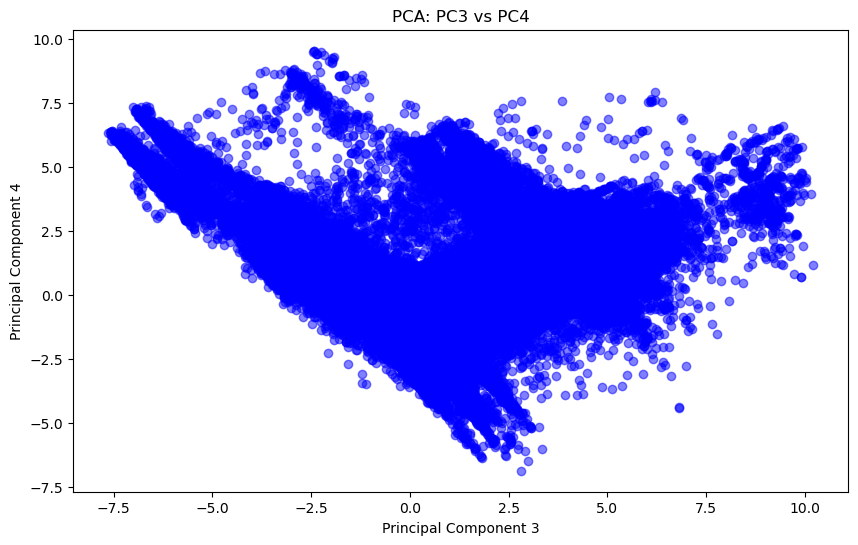

In [160]:
# Ensure numeric data without the datetime column
data_numeric = data.drop(columns=['datetime'])

# Loadings of features on the principal components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=data_numeric.columns
)

print("Feature Loadings on Principal Components:")
print(loadings)

# Scatter plot of PC3 vs PC4
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 2], pca_result[:, 3], c='blue', alpha=0.5)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: PC3 vs PC4')
plt.show()


Clustering completed.


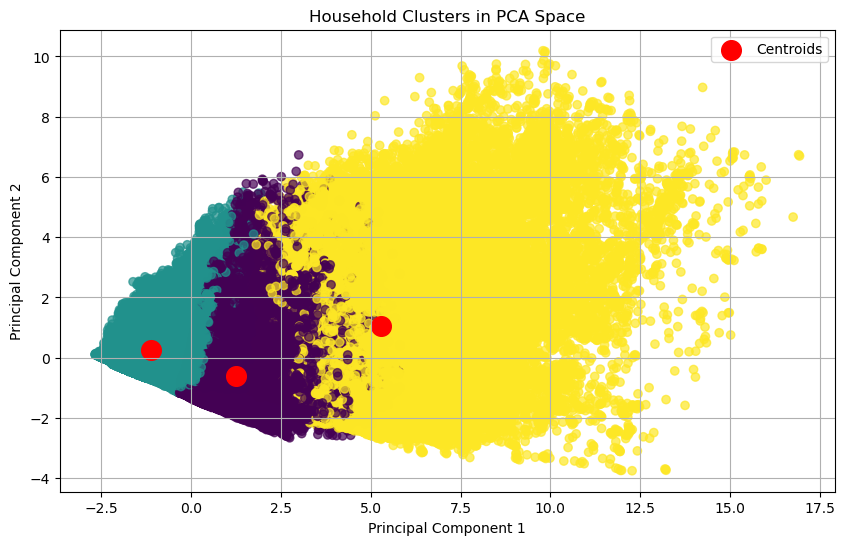

Cluster Analysis:
         Global_active_power  Global_reactive_power     Voltage  \
Cluster                                                           
0                   1.827438               0.135118  239.653444   
1                   0.455895               0.111304  241.779981   
2                   3.950577               0.199812  237.284924   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Cluster                                                                    
0                7.643172        0.200084        0.581189       16.396484  
1                1.988161        0.063628        0.434472        0.597752  
2               16.771357       20.585416       16.947703       11.208816  


In [227]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters
clusters = kmeans.fit_predict(data_pca)

print("Clustering completed.")

# Add cluster labels to the original DataFrame
data['Cluster'] = clusters

import matplotlib.pyplot as plt

# Visualize clusters in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Household Clusters in PCA Space')
plt.legend()
plt.grid()
plt.show()

numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
numeric_data['Cluster'] = data['Cluster']  # Add cluster labels back

# Group by cluster and calculate the mean
cluster_analysis = numeric_data.groupby('Cluster').mean()

print("Cluster Analysis:")
print(cluster_analysis)
